# **Regression Task:**

Name: **Anjul Aryal**

Group: L5CG4

Student id: 2513244

Dataset: Air_Quality_History.csv

# **Air Quality Index (AQI) Prediction Using Machine Learning**

This project predicts Air Quality Index (AQI) using historical air pollution data.
The model helps analyze pollution patterns and supports environmental decision-making.

Student Name: Anjul Aryal
Student ID: 2513244

##  **SDG Alignment**

### **SDG 11 - Sustainable Cities and Communities**

Monitoring air quality helps improve urban health and sustainability.


## **Importing required libraries and loading dataset**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
df=pd.read_csv("/content/drive/MyDrive/Concept and techologies of AI/Air_Quality_History.csv")
df

,AQSID,SITE_NUM,STATE_CODE,STATE_NAME,COUNTY_NAME,PARAMETER_CODE,PARAMETER_NAME,DATETIME_LOCAL,POC,LATITUDE,...,ARITHMETIC_MEAN,FIRST_MAX_VALUE,FIRST_MAX_HOUR,OBSERVATION_COUNT,OBSERVATION_PERCENT,LOCAL_SITE_NAME,ADDRESS,CITY_NAME,CBSA_NAME,OBJECTID
0,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/02/17 05:00:00+00,1,38.895572,...,7,11.3,7,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216681
1,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/02/18 05:00:00+00,1,38.895572,...,6,18.6,22,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216682
2,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/06/08 04:00:00+00,1,38.895572,...,7,17.5,3,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216862
3,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/06/09 04:00:00+00,1,38.895572,...,5,7.7,7,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216863
4,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/06/10 04:00:00+00,1,38.895572,...,9,18.3,22,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45347,110010053,53,11,District Of Columbia,District of Columbia,88101,PM2.5 - Local Conditions,2024/06/16 04:00:00+00,1,38.875161,...,9,17.0,3,24,100,King Greenleaf Rec Center,201 N St SW,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",262347
45348,110010053,53,11,District Of Columbia,District of Columbia,88101,PM2.5 - Local Conditions,2024/06/17 04:00:00+00,1,38.875161,...,11,11.0,0,1,100,King Greenleaf Rec Center,201 N St SW,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",262348
45349,110010053,53,11,District Of Columbia,District of Columbia,88101,PM2.5 - Local Conditions,2024/06/18 04:00:00+00,1,38.875161,...,11,20.0,13,24,100,King Greenleaf Rec Center,201 N St SW,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",262349
45350,110010053,53,11,District Of Columbia,District of Columbia,88101,PM2.5 - Local Conditions,2024/06/19 04:00:00+00,1,38.875161,...,6,11.0,10,24,100,King Greenleaf Rec Center,201 N St SW,Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",262350


##  **Initial Data Exploration**

Checking dataset structure, missing values, and data types.


In [56]:
df.head()


,AQSID,SITE_NUM,STATE_CODE,STATE_NAME,COUNTY_NAME,PARAMETER_CODE,PARAMETER_NAME,DATETIME_LOCAL,POC,LATITUDE,...,ARITHMETIC_MEAN,FIRST_MAX_VALUE,FIRST_MAX_HOUR,OBSERVATION_COUNT,OBSERVATION_PERCENT,LOCAL_SITE_NAME,ADDRESS,CITY_NAME,CBSA_NAME,OBJECTID
0,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/02/17 05:00:00+00,1,38.895572,...,7,11.3,7,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216681
1,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/02/18 05:00:00+00,1,38.895572,...,6,18.6,22,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216682
2,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/06/08 04:00:00+00,1,38.895572,...,7,17.5,3,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216862
3,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/06/09 04:00:00+00,1,38.895572,...,5,7.7,7,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216863
4,110010041,41,11,District Of Columbia,District of Columbia,42602,Nitrogen dioxide (NO2),2022/06/10 04:00:00+00,1,38.895572,...,9,18.3,22,24,100,RIVER TERRACE,"420 34th Street N.E.,Washington, DC 20019",Washington,"Washington-Arlington-Alexandria, DC-VA-MD-WV",216864


In [8]:
df.shape


(45352, 30)

In [57]:
df.info(),df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45352 entries, 0 to 45351
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AQSID                45352 non-null  int64  
 1   SITE_NUM             45352 non-null  int64  
 2   STATE_CODE           45352 non-null  int64  
 3   STATE_NAME           45352 non-null  object 
 4   COUNTY_NAME          45352 non-null  object 
 5   PARAMETER_CODE       45352 non-null  int64  
 6   PARAMETER_NAME       45352 non-null  object 
 7   DATETIME_LOCAL       45352 non-null  object 
 8   POC                  45352 non-null  int64  
 9   LATITUDE             45352 non-null  float64
 10  LONGITUDE            45352 non-null  float64
 11  DATUM                45352 non-null  object 
 12  UNITS_OF_MEASURE     45352 non-null  object 
 13  METHOD_CODE          44464 non-null  float64
 14  METHOD_NAME          45352 non-null  object 
 15  DATE_OF_LAST_CHANGE  45352 non-null 

(None,
 AQSID                      0
 SITE_NUM                   0
 STATE_CODE                 0
 STATE_NAME                 0
 COUNTY_NAME                0
 PARAMETER_CODE             0
 PARAMETER_NAME             0
 DATETIME_LOCAL             0
 POC                        0
 LATITUDE                   0
 LONGITUDE                  0
 DATUM                      0
 UNITS_OF_MEASURE           0
 METHOD_CODE              888
 METHOD_NAME                0
 DATE_OF_LAST_CHANGE        0
 SAMPLE_DURATION            0
 POLLUTANT_STANDARD     33852
 EVENT_TYPE             45287
 AQI                    35004
 ARITHMETIC_MEAN            0
 FIRST_MAX_VALUE            0
 FIRST_MAX_HOUR             0
 OBSERVATION_COUNT          0
 OBSERVATION_PERCENT        0
 LOCAL_SITE_NAME            0
 ADDRESS                    0
 CITY_NAME                  0
 CBSA_NAME                  0
 OBJECTID                   0
 dtype: int64)

##  **Data Cleaning**

 - Rows missing AQI values are removed because they cannot be used for model training as AQI is the target variable


### **Handling Missing Pollution Values**

Missing pollutant values are filled using city-wise mean values to maintain regional pollution characteristics.

In [58]:
# Removing rows where target variable AQI is missing
df = df.dropna(subset=['AQI'])
# Numerical pollutant-related columns
cols = [
    'ARITHMETIC_MEAN',
    'FIRST_MAX_VALUE',
    'OBSERVATION_COUNT',
    'OBSERVATION_PERCENT',
    'LATITUDE',
    'LONGITUDE'
]
# Filling missing values using group-wise mean based on STATE_NAME
df.loc[:, cols] = df.loc[:, cols].fillna(
    df.groupby('STATE_NAME')[cols].transform('mean')
)
# Verifying missing values after cleaning
df.isna().sum()


,0
AQSID,0
SITE_NUM,0
STATE_CODE,0
STATE_NAME,0
COUNTY_NAME,0
PARAMETER_CODE,0
PARAMETER_NAME,0
DATETIME_LOCAL,0
POC,0
LATITUDE,0


### **Filling Remaining Missing Values Using Date-Based Mean**

Remaining missing values are filled using daily average pollution levels.


In [59]:
# Converting datetime column to proper datetime format
df.loc[:, "DATETIME_LOCAL"] = pd.to_datetime(df["DATETIME_LOCAL"], errors="coerce")
# Numerical columns with missing values to be imputed
missing_columns = [
    'METHOD_CODE',
    'AQI'
]
# Filling missing values using date-wise mean
df.loc[:, missing_columns] = df.loc[:, missing_columns].fillna(
    df.groupby('DATETIME_LOCAL')[missing_columns].transform('mean')
)
# Verifying missing values after data cleaning
df.isna().sum()


,0
AQSID,0
SITE_NUM,0
STATE_CODE,0
STATE_NAME,0
COUNTY_NAME,0
PARAMETER_CODE,0
PARAMETER_NAME,0
DATETIME_LOCAL,0
POC,0
LATITUDE,0


### **Checking Duplicate Records**



In [60]:
df.duplicated().sum()

np.int64(0)

##  **Dataset Summary**


In [61]:
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(10348, 30)
       AQSID  SITE_NUM  STATE_CODE            STATE_NAME  \
0  110010041        41          11  District Of Columbia   
1  110010041        41          11  District Of Columbia   
2  110010041        41          11  District Of Columbia   
3  110010041        41          11  District Of Columbia   
4  110010041        41          11  District Of Columbia   

            COUNTY_NAME  PARAMETER_CODE          PARAMETER_NAME  \
0  District of Columbia           42602  Nitrogen dioxide (NO2)   
1  District of Columbia           42602  Nitrogen dioxide (NO2)   
2  District of Columbia           42602  Nitrogen dioxide (NO2)   
3  District of Columbia           42602  Nitrogen dioxide (NO2)   
4  District of Columbia           42602  Nitrogen dioxide (NO2)   

              DATETIME_LOCAL  POC   LATITUDE  ...  ARITHMETIC_MEAN  \
0  2022-02-17 05:00:00+00:00    1  38.895572  ...                7   
1  2022-02-18 05:00:00+00:00    1  38.895572  ...                6   
2  2022-06-08 

##  **AQI Distribution Visualization**


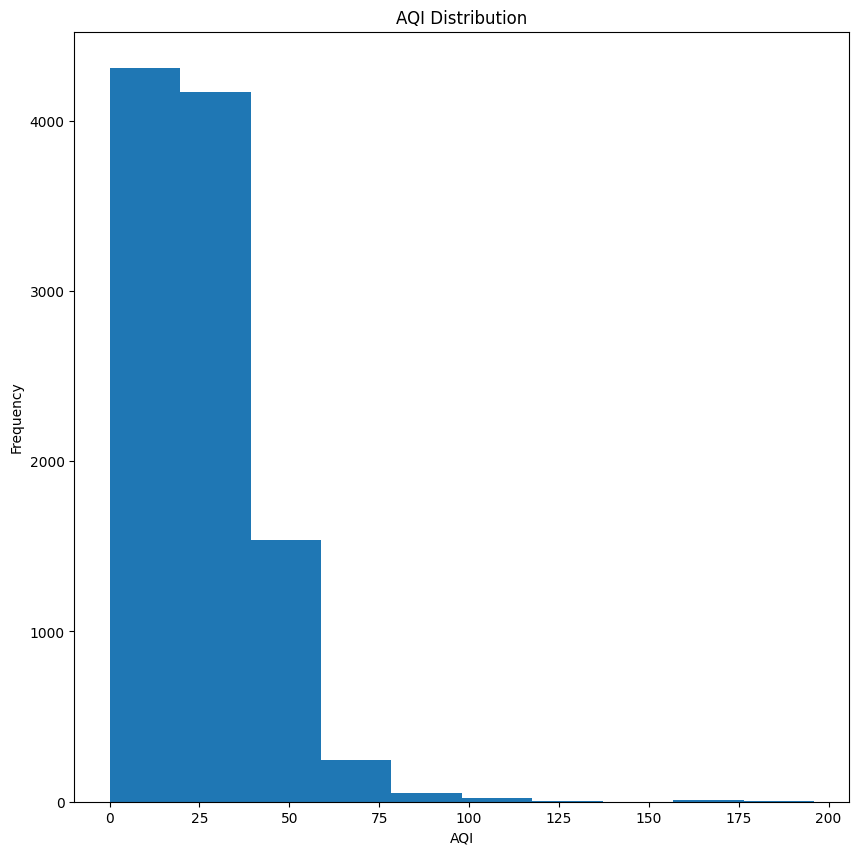

In [62]:
plt.figure(figsize = (10,10))
plt.hist(df['AQI'], bins=10)
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

## **Correlation Analysis**

Analyzing relationship between pollutants and AQI.


In [63]:
# Selecting numerical features for correlation with AQI
cols = [
    'ARITHMETIC_MEAN',
    'FIRST_MAX_VALUE',
    'OBSERVATION_COUNT',
    'OBSERVATION_PERCENT',
    'LATITUDE',
    'LONGITUDE'
]
# Calculating correlation of selected features with AQI
correlation = df.corr(numeric_only=True)['AQI'][cols]
print(correlation)


ARITHMETIC_MEAN        0.364308
FIRST_MAX_VALUE        0.237265
OBSERVATION_COUNT     -0.377841
OBSERVATION_PERCENT    0.055980
LATITUDE              -0.109741
LONGITUDE              0.067008
Name: AQI, dtype: float64


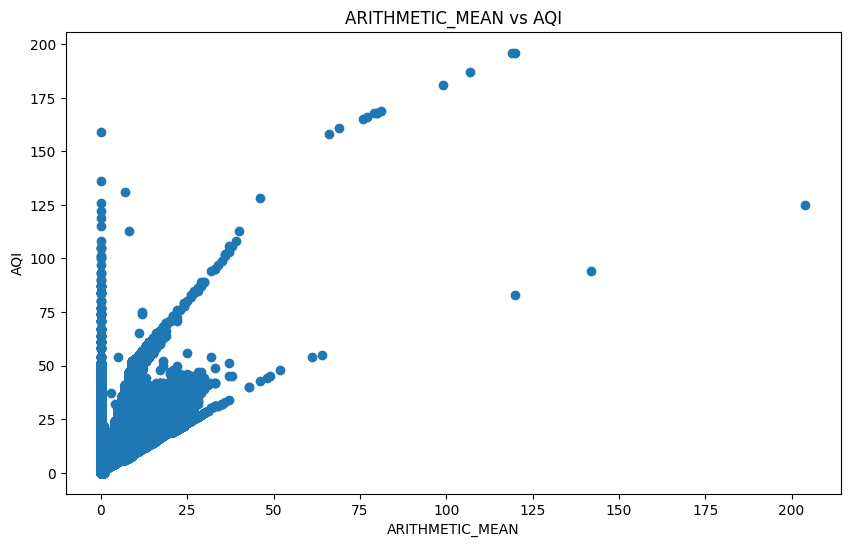

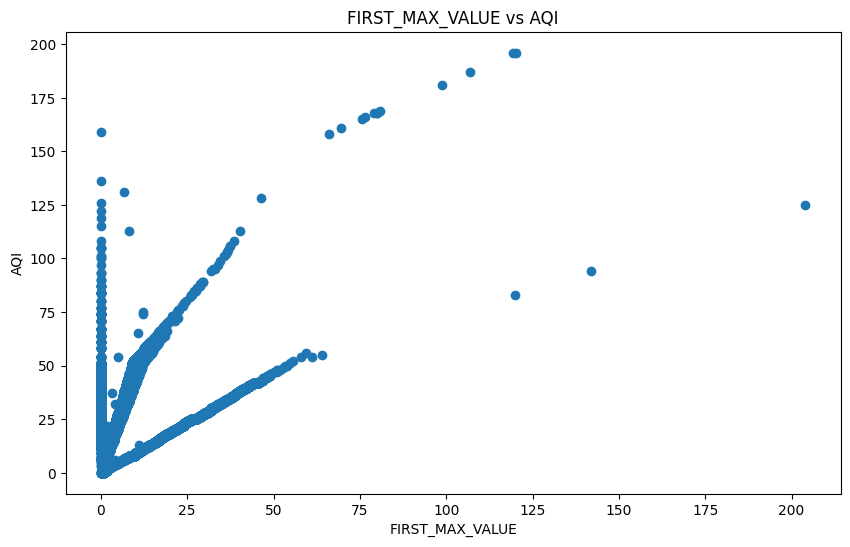

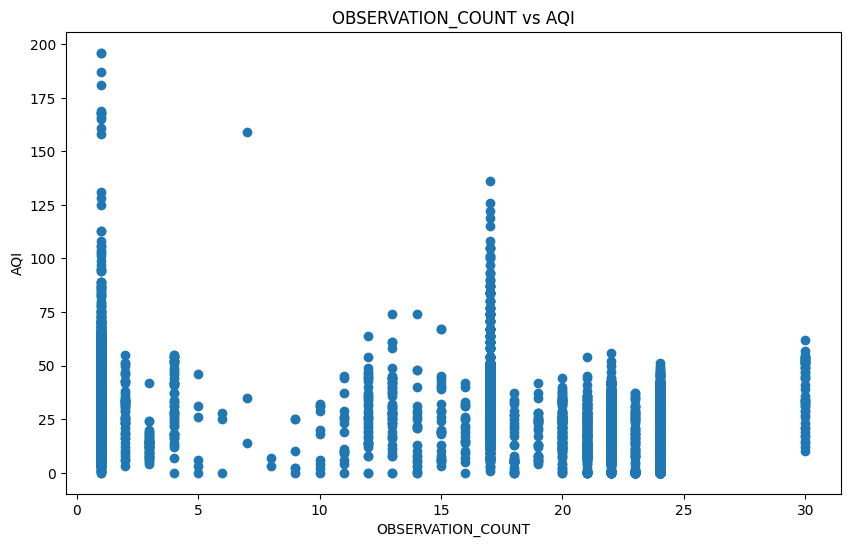

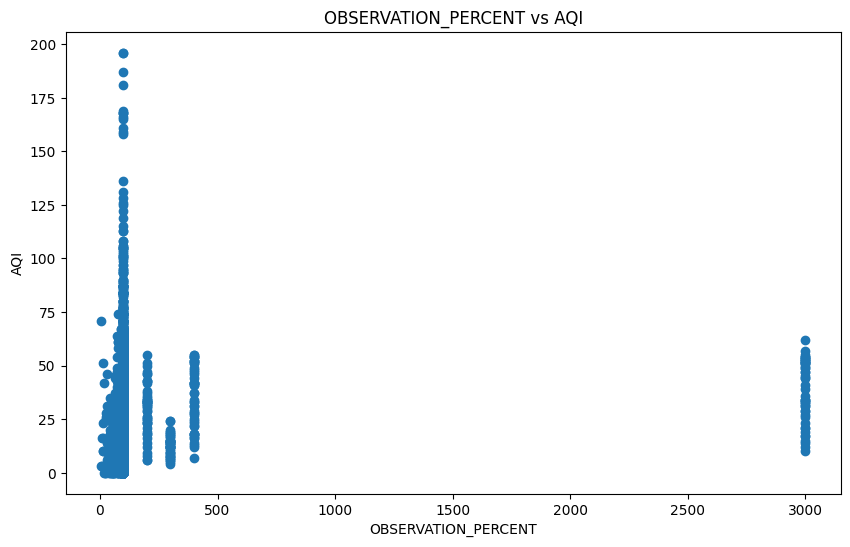

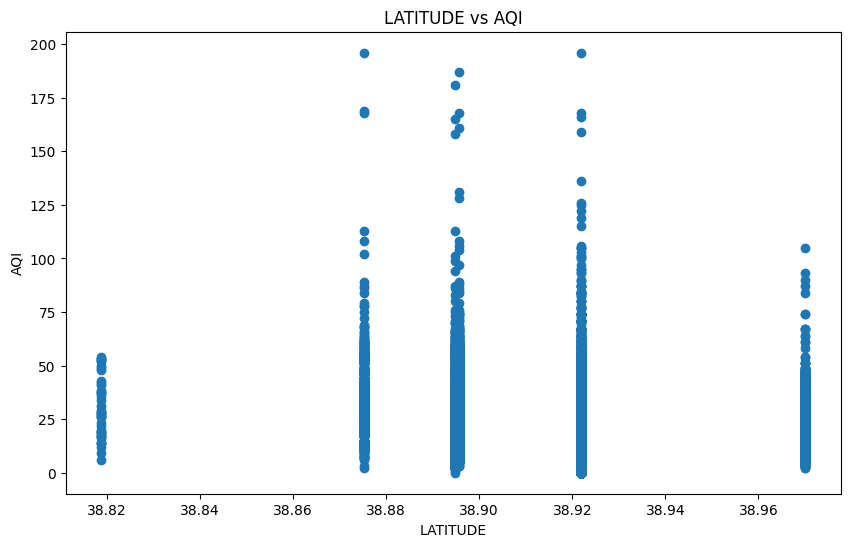

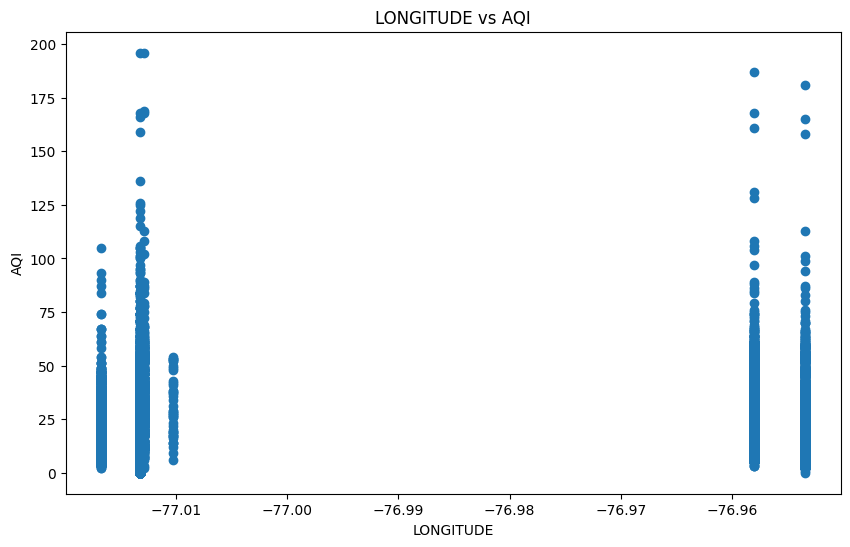

In [64]:
for col in cols:
    plt.figure(figsize=(10,6))
    plt.scatter(df[col], df['AQI'])
    plt.xlabel(col)
    plt.ylabel("AQI")
    plt.title(f"{col} vs AQI")
    plt.show()

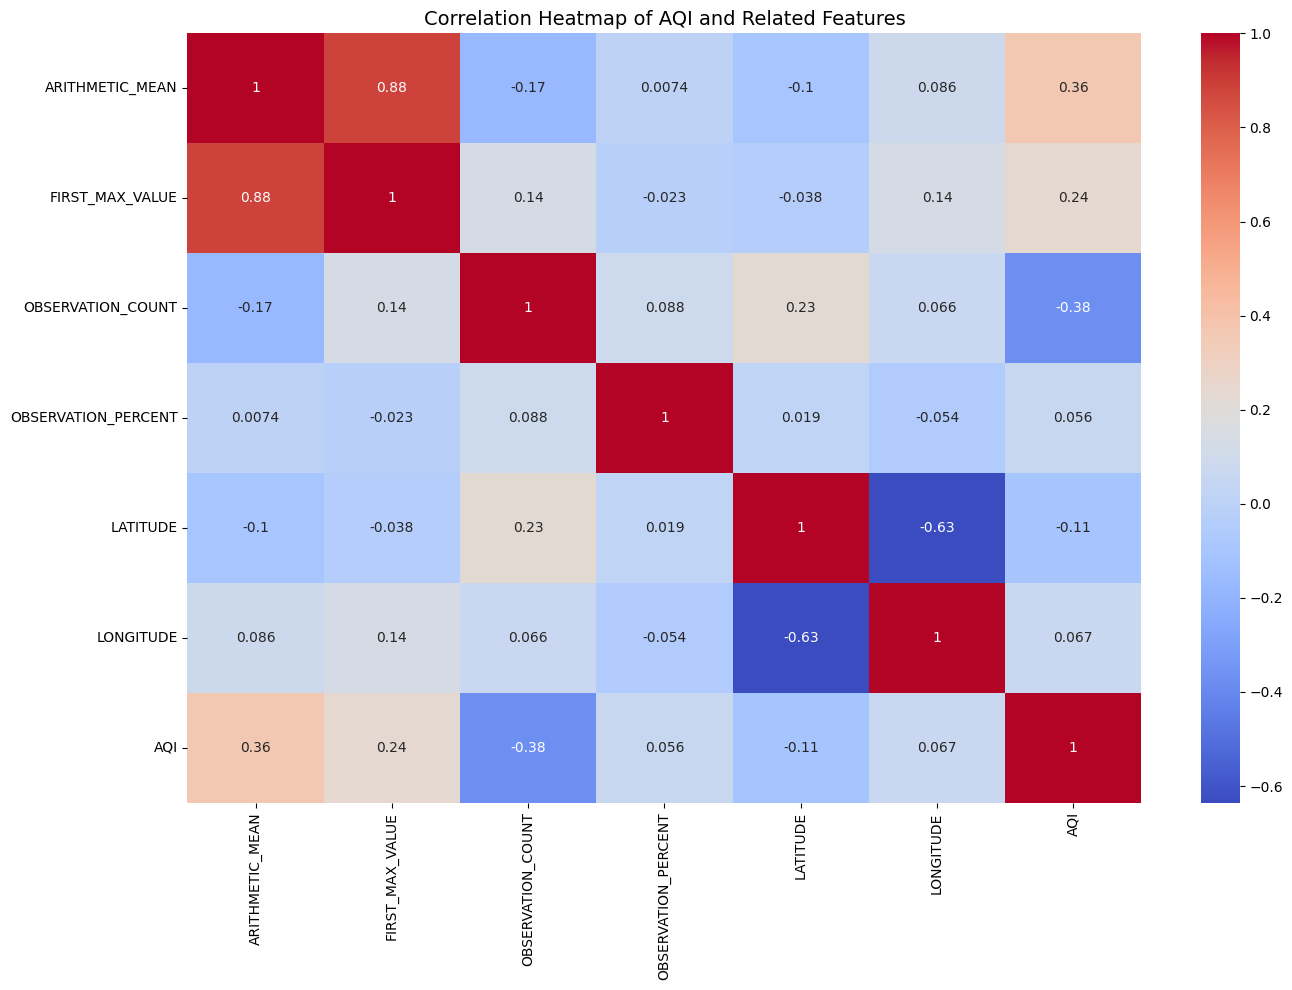

In [37]:

# Selecting numerical features related to AQI
corr_columns = [
    'ARITHMETIC_MEAN',
    'FIRST_MAX_VALUE',
    'OBSERVATION_COUNT',
    'OBSERVATION_PERCENT',
    'LATITUDE',
    'LONGITUDE',
    'AQI'
]
# Computing correlation matrix
corr_matrix = df[corr_columns].corr()


# Plotting correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of AQI and Related Features', fontsize=14)
plt.tight_layout()
plt.show()


## **Outlier Detection**

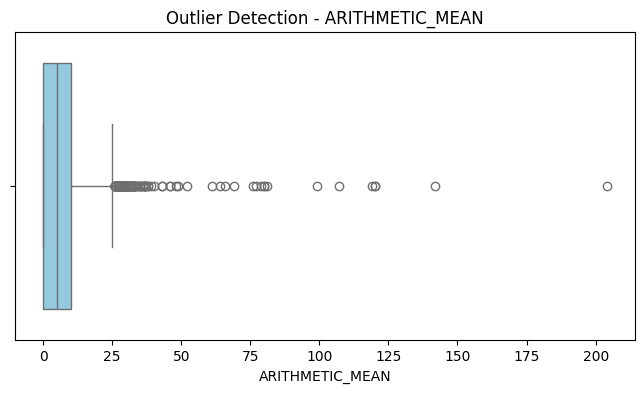

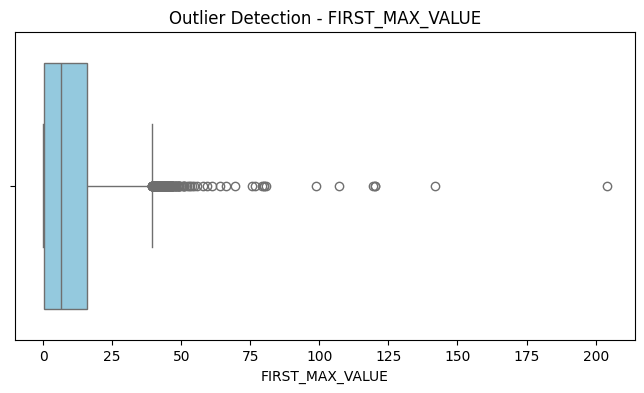

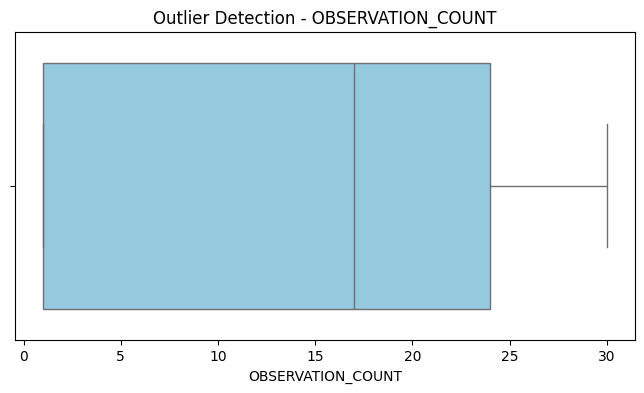

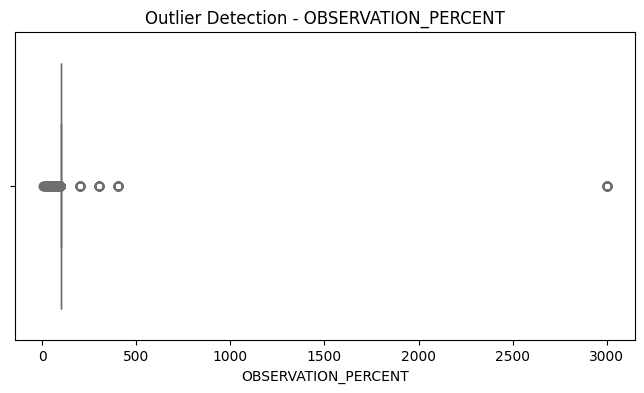

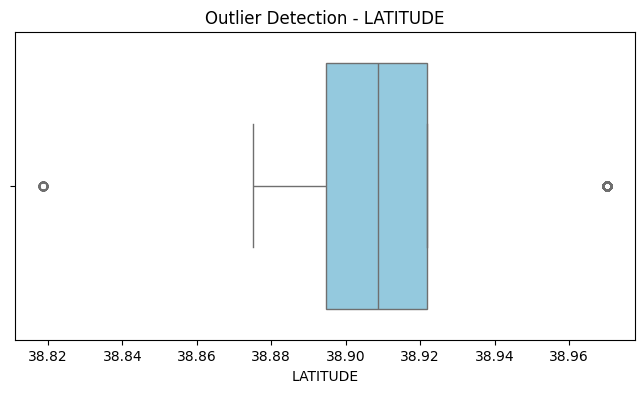

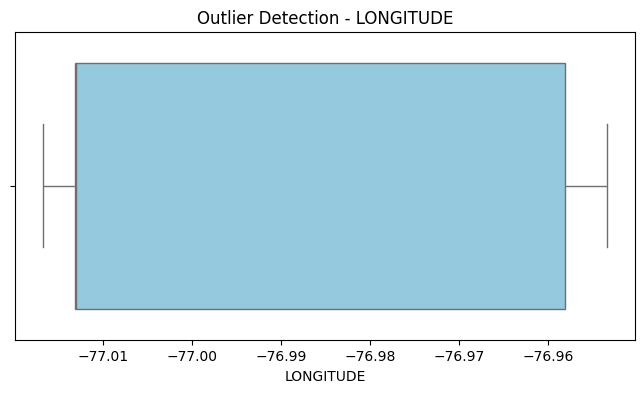

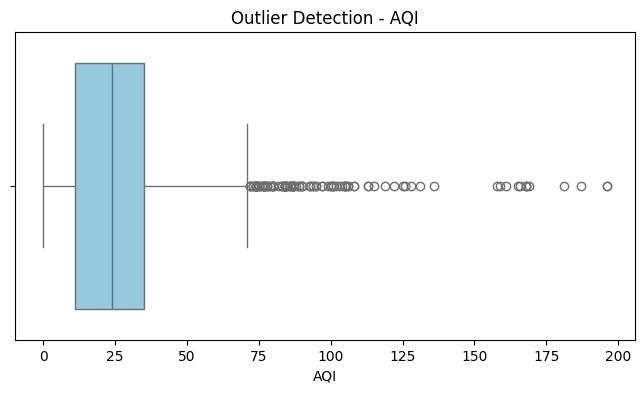

In [65]:
# Columns selected for outlier detection
outlier_cols = [
    'ARITHMETIC_MEAN',
    'FIRST_MAX_VALUE',
    'OBSERVATION_COUNT',
    'OBSERVATION_PERCENT',
    'LATITUDE',
    'LONGITUDE',
    'AQI'
]
# Boxplot visualization for outlier detection
for col in outlier_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outlier Detection - {col}')
    plt.xlabel(col)
    plt.show()



# Outlier Handling

In [66]:
# Numerical columns for outlier treatment
numeric_cols = [
    'ARITHMETIC_MEAN',
    'FIRST_MAX_VALUE',
    'OBSERVATION_COUNT',
    'OBSERVATION_PERCENT',
    'LATITUDE',
    'LONGITUDE',
    'AQI'
]



# Applying IQR method for outlier treatment
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df.loc[:, col] = df[col].clip(lower=lower, upper=upper)

    outliers = ((df[col] < lower) | (df[col] > upper)).sum()


##  **Target Separation**


In [71]:
# Drop rows where target AQI is missing
df_ml = df.dropna(subset=['AQI'])

# Select only numeric columns (exclude AQI)
X = df_ml.select_dtypes(include=['int64', 'float64']).drop(columns=['AQI'])
y = df_ml['AQI']


##  **Train-Test Split and Feature Scaling**


In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  **Multi Layer Perceptron Model**
Training neural network and evaluating performance.

In [74]:
mlp  = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=300,
    early_stopping=True,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)


In [75]:
mlp_train_mse = mean_squared_error(y_train, y_train_pred)
mlp_test_mse = mean_squared_error(y_test, y_test_pred)

mlp_train_mae = mean_absolute_error(y_train, y_train_pred)
mlp_test_mae = mean_absolute_error(y_test, y_test_pred)

mlp_train_rmse = np.sqrt(mlp_train_mse)
mlp_test_rmse = np.sqrt(mlp_test_mse)

mlp_train_r2 = r2_score(y_train, y_train_pred)
mlp_test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"MSE: {mlp_train_mse:.2f}")
print(f"MAE: {mlp_train_mae:.2f}")
print(f"RMSE: {mlp_train_rmse:.2f}")
print(f"R² Score: {mlp_train_r2:.2f}")

print("\nTest Performance:")
print(f"MSE: {mlp_test_mse:.2f}")
print(f"MAE: {mlp_test_mae:.2f}")
print(f"RMSE: {mlp_test_rmse:.2f}")
print(f"R² Score: {mlp_test_r2:.2f}")


Training Performance:
MSE: 30.11
MAE: 2.69
RMSE: 5.49
R² Score: 0.89

Test Performance:
MSE: 30.50
MAE: 2.72
RMSE: 5.52
R² Score: 0.88


##  **Linear Regression Model**


In [76]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [77]:
train_mse_lr = mean_squared_error(y_train, y_train_pred)
test_mse_lr = mean_squared_error(y_test, y_test_pred)

train_rmse_lr = np.sqrt(train_mse_lr)
test_rmse_lr = np.sqrt(test_mse_lr)

train_mae_lr=mean_absolute_error(y_train, y_train_pred)
test_mae_lr=mean_absolute_error(y_test, y_test_pred)

train_r2_lr = r2_score(y_train, y_train_pred)
test_r2_lr = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"MSE: {train_mse_lr:.2f}")
print(f"RMSE: {train_rmse_lr:.2f}")
print(f"MAE: {train_mae_lr:.2f}")
print(f"R² Score: {train_r2_lr:.2f}")

print("\nTest Performance:")
print(f"MSE: {test_mse_lr:.2f}")
print(f"RMSE: {test_rmse_lr:.2f}")
print(f"MAE: {test_mae_lr:.2f}")
print(f"R² Score: {test_r2_lr:.2f}")


Training Performance:
MSE: 120.37
RMSE: 10.97
MAE: 8.12
R² Score: 0.54

Test Performance:
MSE: 124.16
RMSE: 11.14
MAE: 8.15
R² Score: 0.52


##  **Random Forest Regression Model**


In [78]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [79]:
train_mse_rf = mean_squared_error(y_train, y_train_pred)
test_mse_rf = mean_squared_error(y_test, y_test_pred)
train_rmse_rf = np.sqrt(train_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
train_mae_rf=mean_absolute_error(y_train, y_train_pred)
test_mae_rf=mean_absolute_error(y_test, y_test_pred)
train_r2_rf = r2_score(y_train, y_train_pred)
test_r2_rf = r2_score(y_test, y_test_pred)
print("Training Performance:")
print(f"MSE: {train_mse_rf:.2f}")
print(f"RMSE: {train_rmse_rf:.2f}")
print(f"MAE: {train_mae_rf:.2f}")
print(f"R2 Score: {train_r2_rf:.2f}")
print("\nTest Performance:")
print(f"MSE: {test_mse_rf:.2f}")
print(f"RMSE: {test_rmse_rf:.2f}")
print(f"MAE: {test_mae_rf:.2f}")
print(f"R2 Score: {test_r2_rf:.2f}")


Training Performance:
MSE: 0.17
RMSE: 0.41
MAE: 0.05
R2 Score: 1.00

Test Performance:
MSE: 0.95
RMSE: 0.97
MAE: 0.15
R2 Score: 1.00


## **Hyperparameter Tuning**
Optimizing Linear Regression and Random Forest models using RandomizedSearchCV.


### **Random Forest**

In [80]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1)

random_search.fit(X_train, y_train)

best_param_rf = random_search.best_params_
print("Best RF hyperparameters:", best_param_rf)
print("Best CV R²:", random_search.best_score_)

Best RF hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best CV R²: 0.9880547097471473


### **Linear Regression**

In [82]:
param_dist_lr = {
    'fit_intercept': [True, False]
}
random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist_lr,
    n_iter=2,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)
random_search_lr.fit(X_train_scaled, y_train)

best_params_lr = random_search_lr.best_params_
print("Best LR hyperparameters:", best_params_lr)
print("Best CV R²:", random_search_lr.best_score_)

Best LR hyperparameters: {'fit_intercept': False}
Best CV R²: 0.542188835439313


## **Feature Importance Selection**
Decision Tree is used to identify most important features.


In [87]:
dt=DecisionTreeRegressor(max_depth=5,random_state=42)
dt.fit(X_train, y_train)
importances = dt.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)


top_features = feature_importance_df['feature'][:8].tolist()
print("Top 8 features (Decision Tree - Embedded Method):", top_features)
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]



Top 8 features (Decision Tree - Embedded Method): ['FIRST_MAX_VALUE', 'PARAMETER_CODE', 'FIRST_MAX_HOUR', 'ARITHMETIC_MEAN', 'OBJECTID', 'POC', 'OBSERVATION_COUNT', 'STATE_CODE']


In [88]:
lr = LinearRegression()
lr.fit(X_train_top, y_train)


y_train_pred = lr.predict(X_train_top)
y_test_pred = lr.predict(X_test_top)


print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}, R²: {r2_score(y_train, y_train_pred):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}, R²: {r2_score(y_test, y_test_pred):.2f}")


Train RMSE: 11.92, R²: 0.46
Test RMSE: 12.23, R²: 0.42


In [89]:

rf=RandomForestRegressor()
rf.fit(X_train_top, y_train)
y_train_pred = rf.predict(X_train_top)
y_test_pred = rf.predict(X_test_top)

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}, R²: {r2_score(y_train, y_train_pred):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}, R²: {r2_score(y_test, y_test_pred):.2f}")

Train RMSE: 0.39, R²: 1.00
Test RMSE: 0.89, R²: 1.00


##  **Model Retraining Using Top Features**
Models are retrained using selected important features.


### Linear Regression

In [90]:
lr_final = LinearRegression(**best_params_lr)
lr_final.fit(X_train_top, y_train)
y_train_pred_lr = lr_final.predict(X_train_top)
y_test_pred_lr = lr_final.predict(X_test_top)
lr_train_mae = mean_absolute_error(y_train, y_train_pred_lr)
lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
lr_train_r2 = r2_score(y_train, y_train_pred_lr)
lr_test_r2 = r2_score(y_test, y_test_pred_lr)
lr_cv_score = cross_val_score(lr_final, X_train_top, y_train, cv=5, scoring='r2').mean()


### Random Forest

In [91]:
rf_final=RandomForestRegressor(**best_param_rf, random_state=42)
rf_final.fit(X_train_top, y_train)
y_train_pred_rf = rf_final.predict(X_train_top)
y_test_pred_rf = rf_final.predict(X_test_top)
rf_train_mae = mean_absolute_error(y_train, y_train_pred_rf)
rf_test_mae = mean_absolute_error(y_test, y_test_pred_rf)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
rf_train_r2 = r2_score(y_train, y_train_pred_rf)
rf_test_r2 = r2_score(y_test, y_test_pred_rf)
rf_cv_score=cross_val_score(rf_final, X_train_top, y_train, cv=5, scoring='r2').mean()

## **Final Model Comparison**



Comparing performance metrics of optimized models.


In [92]:
comparison_df = pd.DataFrame({
    'Model': ['MLP', 'Linear Regression (Classical)', 'Random Forest (Classical)',
              'Linear Regression (Final)', 'Random Forest (Final)'],
    'Features Used': [X_test_scaled.shape[1], X_test_scaled.shape[1], X_test.shape[1],
                      len(top_features), len(top_features)],
    'CV Score': ['-', '-', '-',
                 round(lr_cv_score, 3), round(rf_cv_score, 3)],
    'MAE': [round(mlp_test_mae, 2), round(test_mae_lr, 2), round(test_mae_rf, 2),
            round(lr_test_mae, 2), round(rf_test_mae, 2)],
    'Test RMSE': [round(mlp_test_rmse, 2), round(test_rmse_lr, 2), round(test_rmse_rf, 2),
                  round(lr_test_rmse, 2), round(rf_test_rmse, 2)],
    'Test R²': [round(mlp_test_r2, 3), round(test_r2_lr, 3), round(test_r2_rf, 3),
                round(lr_test_r2, 3), round(rf_test_r2, 3)]
})

print("Model Comparison Table:")
print(comparison_df)

Model Comparison Table:
                           Model  Features Used CV Score   MAE  Test RMSE  \
0                            MLP             14        -  2.72       5.52   
1  Linear Regression (Classical)             14        -  8.15      11.14   
2      Random Forest (Classical)             14        -  0.15       0.97   
3      Linear Regression (Final)              8     0.46  8.95      12.23   
4          Random Forest (Final)              8    0.994  0.35       0.96   

   Test R²  
0    0.882  
1    0.521  
2    0.996  
3    0.423  
4    0.996  
